In [68]:
import numpy as np
from sklearn import datasets

np.random.seed(42)

### Dataset preparation

In [69]:
iris = datasets.load_iris()

x = iris.data[:,:2] # [:] => jede Zeile, :2 => Spalte 0 und 1
y = iris.target

class_names = iris.target_names
description = iris.DESCR

### Dataset split

In [70]:
num_samples = x.shape[0]
num_features = x.shape[1]
num_classes = y.shape[0]

print(f"num samples: {num_samples}")
print(f"num features: {num_features}")
print(f"num classes: {num_classes}")

num samples: 150
num features: 2
num classes: 150


In [71]:
# '//' entspricht integer division
test_size = num_samples // 3

random_idxs = np.random.permutation(num_samples) # [0, num_samples -1] zufaellig angeordnet

print(f"random_idxs: {random_idxs}")
print(f"random_idxs ohne #testsize elemente: {random_idxs[:-test_size]}")
print(f"random_idxs nur #testsize elemente: {random_idxs[-test_size:]}")
x_train = x[random_idxs[:-test_size]]
y_train = y[random_idxs[:-test_size]]

x_test = x[random_idxs[-test_size:]]    
y_test = y[random_idxs[-test_size:]]

random_idxs: [ 73  18 118  78  76  31  64 141  68  82 110  12  36   9  19  56 104  69
  55 132  29 127  26 128 131 145 108 143  45  30  22  15  65  11  42 146
  51  27   4  32 142  85  86  16  10  81 133 137  75 109  96 105  66   0
 122  67  28  40  44  60 123  24  25  23  94  39  95 117  47  97 113  33
 138 101  62  84 148  53   5  93 111  49  35  80  77  34 114   7  43  70
  98 120  83 134 135  89   8  13 119 125   3  17  38  72 136   6 112 100
   2  63  54 126  50 115  46 139  61 147  79  59  91  41  58  90  48  88
 107 124  21  57 144 129  37 140   1  52 130 103  99 116  87  74 121 149
  20  71 106  14  92 102]
random_idxs ohne #testsize elemente: [ 73  18 118  78  76  31  64 141  68  82 110  12  36   9  19  56 104  69
  55 132  29 127  26 128 131 145 108 143  45  30  22  15  65  11  42 146
  51  27   4  32 142  85  86  16  10  81 133 137  75 109  96 105  66   0
 122  67  28  40  44  60 123  24  25  23  94  39  95 117  47  97 113  33
 138 101  62  84 148  53   5  93 111  49  35  80

In [72]:
print(f"x_train shape:\n{x_train.shape}")
print(f"y_train shape:\n{y_train.shape}")

print(f"x_test shape:\n{x_test.shape}")
print(f"y_test shape:\n{y_test.shape}")

x_train shape:
(100, 2)
y_train shape:
(100,)
x_test shape:
(50, 2)
y_test shape:
(50,)


### KNN Model

In [73]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)
print(f"accuracy :{accuracy*100.0:.4}%")

y_pred = clf.predict(x_test)
print(f"y_pred :\n{y_pred}")

accuracy :94.0%
y_pred :
[0 0 0 2 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 2 2
 2 1 2 1 1 2 2 0 1 1 0 1 2]


### Try different hyperparameters

In [74]:
n_neighbors = [i for i in range (1,11)] #[1,2,...10]
weight_modes = ['uniform', 'distance']

#alle permutationen => 10 x 2 => 20 Modelle
for n_neighbor in n_neighbors:
    for weight_mode in weight_modes:
        clf = KNeighborsClassifier(n_neighbors=n_neighbor, weights=weight_mode)
        clf.fit(x_train, y_train)
        accuracy = clf.score(x_test, y_test)
        print(f"Neighbors: {n_neighbor} Weight: {weight_mode} Score: {accuracy*100.0:.4}%")


Neighbors: 1 Weight: uniform Score: 92.0%
Neighbors: 1 Weight: distance Score: 92.0%
Neighbors: 2 Weight: uniform Score: 96.0%
Neighbors: 2 Weight: distance Score: 92.0%
Neighbors: 3 Weight: uniform Score: 94.0%
Neighbors: 3 Weight: distance Score: 92.0%
Neighbors: 4 Weight: uniform Score: 98.0%
Neighbors: 4 Weight: distance Score: 92.0%
Neighbors: 5 Weight: uniform Score: 98.0%
Neighbors: 5 Weight: distance Score: 96.0%
Neighbors: 6 Weight: uniform Score: 98.0%
Neighbors: 6 Weight: distance Score: 96.0%
Neighbors: 7 Weight: uniform Score: 98.0%
Neighbors: 7 Weight: distance Score: 96.0%
Neighbors: 8 Weight: uniform Score: 98.0%
Neighbors: 8 Weight: distance Score: 96.0%
Neighbors: 9 Weight: uniform Score: 98.0%
Neighbors: 9 Weight: distance Score: 96.0%
Neighbors: 10 Weight: uniform Score: 98.0%
Neighbors: 10 Weight: distance Score: 96.0%


### Best KNN Model

In [75]:
clf = KNeighborsClassifier(n_neighbors=8, weights='uniform')
clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)
print(f"accuracy :{accuracy*100.0:.4}%")

y_pred = clf.predict(x_test)
print(f"y_pred :\n{y_pred}")

y_pred_proba = clf.predict_proba(x_test)
print(f"y_pred_proba :\n{y_pred_proba}")

accuracy :98.0%
y_pred :
[0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2
 2 1 2 1 1 2 2 0 1 1 0 1 2]
y_pred_proba :
[[1.    0.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    0.625 0.375]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    0.375 0.625]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [0.    0.625 0.375]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [0.    1.    0. 

### Decision Border Plot

In [76]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
cmap_points = ['red', 'blue', 'green']

def make_meshgrid(x: np.ndarray, y: np.ndarray):
    x = np.arange(np.min(x)-1, np.max(x)+1, 0.01)   #kleinster x-wert-1 bis groesster x-wert +1, im interval 0.01
    y = np.arange(np.min(y)-1, np.max(y)+1, 0.01)  

    xx, yy = np.meshgrid(x,y)
    return xx, yy

def plot_contours(ax: plt.Axes, clf: KNeighborsClassifier, xx: np.ndarray, yy: np.ndarray, **params):
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = np.reshape(z, (xx.shape))
    print(z.shape)
    ax.contourf(xx, yy, z, **params)

def plot_decision_border(clf:KNeighborsClassifier, x_train: np.ndarray, y_train: np.ndarray, x_test: np.ndarray, y_test: np.ndarray):
    fig, ax = plt.subplots() # fig => bildeigenschaften, ax => grafik selbst
    x0 = x_train[:, 0]  # alle zeilen, erste spalte
    x1 = x_train[:, 1]  # alle zeilen, zweite spalte

    xx, yy = make_meshgrid(x0, x1)
    plot_contours(ax, clf, xx, yy, cmap=cmap_background, alpha=0.5)

    for idx, point in enumerate(x_train):
        plt.scatter(point[0], point[1], color=cmap_points[y_train[idx]], s=20.0, marker='o')

    for idx, point in enumerate(x_test):
        plt.scatter(point[0], point[1], color=cmap_points[y_test[idx]], s=40.0, marker='*')   

    plt.show()


(440, 790)


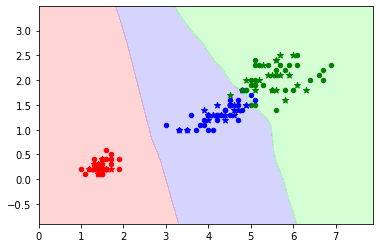

In [77]:
plot_decision_border(clf, x_train,y_train,x_test, y_test)